<h1>Implementing Linear Regression From Scratch in Python</h1>

<p>The core of many machine learning algorithms is optimization.</p><p>Optimization algorithms are used by machine learning algorithms to find a good set of model parameters given a training dataset.</p><p>The most common optimization algorithm used in machine learning is stochastic gradient descent.</p><p>In this notebook, you will discover how to implement stochastic gradient descent to optimize a linear regression algorithm from scratch with Python.</p><p>After completing this tutorial, you will know:</p><ul>
<li>How to estimate linear regression coefficients using stochastic gradient descent.</li>
<li>How to make predictions for multivariate linear regression.</li>
<li>How to implement linear regression with stochastic gradient descent to make predictions on new data.</li>
</ul>

<h2>Description</h2><p>In this section, we will describe linear regression, the stochastic gradient descent technique and the wine quality dataset used in this tutorial.</p><h3>Multivariate Linear Regression</h3><p>Linear regression is a technique for predicting a real value.</p><p>Confusingly, these problems where a real value is to be predicted are called regression problems.</p><p>Linear regression is a technique where a straight line is used to model the relationship between input and output values. In more than two dimensions, this straight line may be thought of as a plane or hyperplane.</p><p>Predictions are made as a combination of the input values to predict the output value.</p><p>Each input attribute (x) is weighted using a coefficient (b), and the goal of the learning algorithm is to discover a set of coefficients that results in good predictions (y).</p><p></p><p>$$ y = b_0 + b_1 x_1 + b_2 x_2 + \dots $$</p><p>Coefficients can be found using stochastic gradient descent.</p>


<h3>Stochastic Gradient Descent</h3><p>Gradient Descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest decrease of that function.</p><p>In the context of machine learning, we often have a "cost" or "loss" function that measures how wrong our model is in terms of its ability to estimate the relationship between X (inputs) and y (outputs). The cost function measures how "costly" our current set of model coefficients are, in terms of getting predictions wrong when we use them. In linear regression, the cost function could be the Mean Squared Error (MSE). Minimizing this function is the same as making our predictions as accurate as possible.</p><p>The "gradient" captures the sensitivity or rate of change of the cost function concerning slight changes in each of its coefficients. The gradient always points in the direction of steepest increase of the function. Thus, the negative gradient points in the direction of steepest decrease. In simpler terms, we're "descending" down the cost function's curve by going in the direction where it drops the steepest, until we hopefully reach a minimum point where the cost is as low as it can get given our model and data.</p>
<img src="rmse_cost_function_curve_example.png" width=400, height=450>
<p>In machine learning, we can use a technique that evaluates and updates the coefficients every iteration called stochastic gradient descent to minimize the error of a model on our training data.</p><p>The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction. This process is repeated for a fixed number of iterations.</p><p>This procedure can be used to find the set of coefficients in a model that result in the smallest error for the model on the training data. Each iteration, the coefficients (b) in machine learning language are updated using the equation:</p><p></p><p>$$ b = b - \text{learning_rate} \times \text{error} \times x $$</p><p>Where <strong>b</strong> is the coefficient or weight being optimized, <strong>learning_rate</strong> is a learning rate that you must configure (e.g. 0.01), <strong>error</strong> is the prediction error for the model on the training data attributed to the weight, and <strong>x</strong> is the input value.</p>

<h3>Wine Quality Dataset</h3><p>After we develop our linear regression algorithm with stochastic gradient descent, we will use it to model the wine quality dataset.</p><p>This dataset is comprised of the details of 4,898 white wines including measurements like acidity and pH. The goal is to use&nbsp;these objective measures to predict the wine quality on a scale between 0 and 10.</p><p>Below is a sample of the first 5 records from this dataset.</p>

In [6]:

import pandas as pd
df = pd.read_csv('winequality-white.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4898 non-null   float64
 1   1       4898 non-null   float64
 2   2       4898 non-null   float64
 3   3       4898 non-null   float64
 4   4       4898 non-null   float64
 5   5       4898 non-null   float64
 6   6       4898 non-null   float64
 7   7       4898 non-null   float64
 8   8       4898 non-null   float64
 9   9       4898 non-null   float64
 10  10      4898 non-null   float64
 11  11      4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<p>The dataset must be normalized to the values between 0 and 1 as each attribute has&nbsp;different units and in turn different scales.</p><p>By predicting the mean value (Zero Rule Algorithm) on the normalized dataset, a baseline root mean squared error (RMSE) of 0.148 can be achieved.</p><p>You can learn more about the dataset on the <a href="http://archive.ics.uci.edu/ml/datasets/Wine+Quality">UCI Machine Learning Repository</a>.</p><p>You can download the dataset and save it in your current working directory with the name <strong>winequality-white.csv</strong>. You must remove the header information from the start of the file, and convert the “;” value separator to “,” to meet CSV format.</p>

<h2>Notebook</h2><p>This notebook is broken down into 3&nbsp;parts:</p><ol>
<li>Making Predictions.</li>
<li>Estimating Coefficients.</li>
<li>Wine Quality Prediction.</li>
</ol><p>This will provide the foundation you need to implement and apply linear regression with stochastic gradient descent on your own predictive modeling problems.</p>

<h3>1. Making Predictions</h3><p>The first step is to develop a function that can make predictions.</p><p>This will be needed both in the evaluation of candidate coefficient values in stochastic gradient descent and after the model is finalized and we wish to start making predictions on test data or new data.</p><p>Below is a function named <strong>predict()</strong> that predicts an output value for a row given a set of coefficients.</p><p>The first coefficient in is always the intercept, also called the bias or b0 as it is standalone and not responsible for a specific input value.</p>

In [5]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

<p>We can contrive a small dataset to test our prediction function.</p>

In [7]:
df2 = pd.read_csv('test.csv', header = None)
df2

,0,1
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


<p>Below is a scatter plot of this dataset.</p>

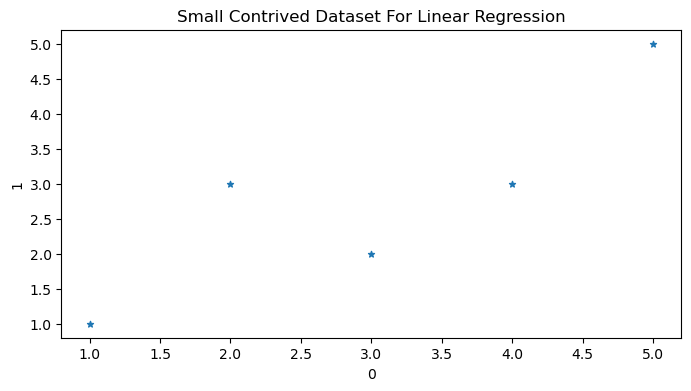

In [8]:
import matplotlib
plt = df2.plot.scatter(x = 0, y= 1, title ='Small Contrived Dataset For Linear Regression', figsize=(8,4),marker='*')

<p>We can also use previously prepared coefficients to make predictions for this dataset.</p><p>Putting this all together we can test our <strong>predict()</strong> function below.</p>

In [9]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat
 
#dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
dataset = df2.values
coef = [0.4, 0.8]
for row in dataset:
    yhat = predict(row, coef)
    print("Expected=%.3f, Predicted=%.3f" % (row[-1], yhat))

Expected=1.000, Predicted=1.200
Expected=3.000, Predicted=2.000
Expected=3.000, Predicted=3.600
Expected=2.000, Predicted=2.800
Expected=5.000, Predicted=4.400


<p>There is a single input value (x) and two coefficient values (b0 and b1). The prediction equation we have modeled for this problem is:</p><p></p><p>$$ y = b_0 + b_1 x_1 $$</p><p>or, with the specific coefficient values we chose by hand as:</p><p></p><p>$$ y = 0.4 + 0.8 x_1 $$</p><p>Now we are ready to implement stochastic gradient descent to optimize our coefficient values.</p>

<h3>2. Estimating Coefficients</h3><p>We can estimate the coefficient values for our training data using stochastic gradient descent.</p><p>Stochastic gradient descent requires two parameters:</p><ul>
<li><strong>Learning Rate</strong>: Used to limit the amount each coefficient is corrected each time it is updated.</li>
<li><strong>Epochs</strong>: The number of times to run through the training data while updating the coefficients.</li>
</ul><p>These, along with the training data will be the arguments to the function.</p><p>There are 3 loops we need to perform in the function:</p><ol>
<li>Loop over each epoch.</li>
<li>Loop over each row in the training data for an epoch.</li>
<li>Loop over each coefficient and update it for a row in an epoch.</li>
</ol><p>As you can see, we update each coefficient for each row in the training data, each epoch.</p><p>Coefficients are updated based on the error the model made. The error is calculated as the difference between the prediction made with the candidate coefficients and the expected output value.</p><p></p><p>$$ \text{error} = \text{prediction} - \text{expected} $$
</p><p>There is one coefficient to weight each input attribute, and these are updated in a consistent way, for example:</p><p></p><p>$$ b_1(t+1) = b_1(t) - \text{learning_rate} \times \text{error}(t) \times x_1(t) $$
</p><p>The special coefficient at the beginning of the list, also called the intercept or the bias, is updated in a similar way, except without an input as it is not associated with a specific input value:</p><p></p><p>$$ b_0(t+1) = b_0(t) - \text{learning_rate} \times \text{error}(t) $$
</p><p>Now we can put all of this together. Below is a function named <strong>coefficients_sgd()</strong> that calculates coefficient values for a training dataset using stochastic gradient descent.</p>

In [11]:
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef

<p>You can see, that in addition, we keep track of the sum of the squared error (a positive value) each epoch so that we can print out a nice message in the outer loop.</p><p>We can test this function on the same small contrived dataset from above.</p>

In [12]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat
 
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef
 
# Calculate coefficients
#dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
dataset = df2.values
l_rate = 0.001
#l_rate = 0.0050
n_epoch = 50
#n_epoch = 200
coef = coefficients_sgd(dataset, l_rate, n_epoch)
for row in dataset:
    yhat = predict(row, coef)
    print("Expected=%.3f, Predicted=%.3f" % (row[-1], yhat))
print(coef)
#coef

>epoch=0, lrate=0.001, error=46.236
>epoch=1, lrate=0.001, error=41.305
>epoch=2, lrate=0.001, error=36.930
>epoch=3, lrate=0.001, error=33.047
>epoch=4, lrate=0.001, error=29.601
>epoch=5, lrate=0.001, error=26.543
>epoch=6, lrate=0.001, error=23.830
>epoch=7, lrate=0.001, error=21.422
>epoch=8, lrate=0.001, error=19.285
>epoch=9, lrate=0.001, error=17.389
>epoch=10, lrate=0.001, error=15.706
>epoch=11, lrate=0.001, error=14.213
>epoch=12, lrate=0.001, error=12.888
>epoch=13, lrate=0.001, error=11.712
>epoch=14, lrate=0.001, error=10.668
>epoch=15, lrate=0.001, error=9.742
>epoch=16, lrate=0.001, error=8.921
>epoch=17, lrate=0.001, error=8.191
>epoch=18, lrate=0.001, error=7.544
>epoch=19, lrate=0.001, error=6.970
>epoch=20, lrate=0.001, error=6.461
>epoch=21, lrate=0.001, error=6.009
>epoch=22, lrate=0.001, error=5.607
>epoch=23, lrate=0.001, error=5.251
>epoch=24, lrate=0.001, error=4.935
>epoch=25, lrate=0.001, error=4.655
>epoch=26, lrate=0.001, error=4.406
>epoch=27, lrate=0.001,

<p>We use a small learning rate of 0.001 and train the model for 50 epochs, or 50 exposures of the coefficients to the entire training dataset.</p><p>Running the example prints a message each epoch with the sum squared error for that epoch and the final set of coefficients.</p><p>You can see how error continues to drop even in the final epoch. We could probably train for a lot longer (more epochs) or increase the amount we update the coefficients each epoch (higher learning rate).</p><p>Experiment and see what you come up with.</p><p>Now, let’s apply this algorithm on a real dataset.</p>

<h3>3. Wine Quality Prediction</h3><p>In this section, we will train a linear regression model using stochastic gradient descent on the wine quality dataset.</p><p>The example assumes that a CSV copy of the dataset is in the current working directory with the filename <strong>winequality-white.csv</strong>.</p><p>The dataset is first loaded, the string values converted to numeric and each column is normalized to values in the range of 0 to 1. This is achieved with helper functions <strong>load_csv()</strong> and <strong>str_column_to_float()</strong> to load and prepare the dataset and <strong>dataset_minmax()</strong> and <strong>normalize_dataset()</strong> to normalize it.</p><p>We will use k-fold cross-validation to estimate the performance of the learned model on unseen data. This means that we will construct and evaluate k models and estimate the performance as the mean model error. Root Mean Squared Error will be used to evaluate each model. These behaviors are provided in the <strong>cross_validation_split()</strong>, <strong>rmse_metric()</strong> and <strong>evaluate_algorithm()</strong> helper functions.</p><p>We will use the <strong>predict()</strong>, <strong>coefficients_sgd()</strong> and <strong>linear_regression_sgd()</strong> functions created above to train the model.</p><p>Below is the complete example.</p>

In [1]:
# Linear Regression With Stochastic Gradient Descent for Wine Quality
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [2]:
# Load a CSV file
def load_csv(filename):
    dataset = []
    #dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [15]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [16]:
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = []
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [17]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = []
    #dataset_copy = list(dataset)
    dataset_copy = dataset
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [18]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [19]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = []
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = []
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        rmse = rmse_metric(actual, predicted)
        scores.append(rmse)
    return scores

In [20]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat
 
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
            #print(l_rate, n_epoch, error)
    return coef
 
# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
    predictions = []
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return(predictions)

In [12]:
# Linear Regression on wine quality dataset
seed(1)
# load and prepare data
filename = 'winequality-white.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.001
n_epoch = 200
scores = evaluate_algorithm(dataset, linear_regression_sgd, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean RMSE: %.3f' % (sum(scores)/float(len(scores))))

NameError: name 'dataset_minmax' is not defined

In [22]:
# Linear Regression on wine quality dataset
seed(1)
# load and prepare data
filename = 'winequality-white.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
n_epoch = 50
l_rate = 0.001

coef = coefficients_sgd(dataset, l_rate, n_epoch)
for row in dataset[:20]:
    yhat = predict(row, coef)
    print("Expected=%.3f, Predicted=%.3f" % (row[-1], yhat))

Expected=0.500, Predicted=0.402
Expected=0.500, Predicted=0.382
Expected=0.500, Predicted=0.432
Expected=0.500, Predicted=0.444
Expected=0.500, Predicted=0.444
Expected=0.500, Predicted=0.432
Expected=0.500, Predicted=0.400
Expected=0.500, Predicted=0.402
Expected=0.500, Predicted=0.382
Expected=0.500, Predicted=0.485
Expected=0.333, Predicted=0.524
Expected=0.333, Predicted=0.410
Expected=0.333, Predicted=0.491
Expected=0.667, Predicted=0.618
Expected=0.333, Predicted=0.417
Expected=0.667, Predicted=0.541
Expected=0.500, Predicted=0.332
Expected=0.833, Predicted=0.482
Expected=0.500, Predicted=0.470
Expected=0.333, Predicted=0.402


<p>A k value of 5 was used for cross-validation, giving each fold 4,898/5 = 979.6 or just under 1000 records to be evaluated upon each iteration. A learning rate of 0.01 and 50 training epochs were chosen with a little experimentation.</p><p>You can try your own configurations and see if you can beat my score.</p><p>Running this example prints the scores for each of the 5 cross-validation folds&nbsp;then prints the mean RMSE.</p><p>We can see that the RMSE (on the normalized dataset) is 0.126, lower than the baseline value of 0.148 if we just predicted the mean (using the Zero Rule Algorithm).</p>

<h2>Zero Rule Algorithm</h2><p><strong>Zero Rule</strong> or <strong>ZeroR</strong> is the benchmark procedure for classification algorithms whose output is simply the most frequently occurring classification in a set of data. If 65% of data items have that classification, ZeroR would presume that all data items have it and would be right 65% of the time.</p><p>ZeroR is a simple and effective benchmark: if an algorithm correctly predicts classifications less frequently than ZeroR, it is obviously of no value for the domain in question!</p>

<h2>Review</h2><p>In this tutorial, you discovered how to implement linear regression using stochastic gradient descent from scratch with Python.</p><p>You learned.</p><ul>
<li>How to make predictions for a multivariate linear regression problem.</li>
<li>How to optimize a set of coefficients using stochastic gradient descent.</li>
<li>How to apply the technique to a real regression predictive modeling problem.</li>
</ul>

In [16]:
from random import seed, randrange
from csv import reader
from math import sqrt
import numpy as np

# Load a CSV file
def load_csv(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = []
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = []
    dataset_copy = list(dataset)
    fold_size = len(dataset) // n_folds
    for _ in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = np.sum((np.array(predicted) - np.array(actual)) ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = []
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = [row[:-1] for row in fold]  # Exclude the target variable
        actual = [row[-1] for row in fold]  # Get the actual target values
        predicted = algorithm(train_set, test_set, *args)
        rmse = rmse_metric(actual, predicted)
        scores.append(rmse)
    return scores  

# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)):
        yhat += coefficients[i + 1] * row[i]
    return yhat
 
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for _ in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row[:-1], coef)  # Exclude the target variable
            error = yhat - row[-1]  # Calculate the error
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row) - 1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
    return coef
 
# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
    predictions = []
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return predictions

# Linear Regression on wine quality dataset
seed(1)
# load and prepare data
filename = 'winequality-white.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.01  # Adjust the learning rate
n_epoch = 50 # Increase the number of epochs
scores = evaluate_algorithm(dataset, linear_regression_sgd, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean RMSE: %.3f' % (sum(scores) / float(len(scores))))


Scores: [0.12248058224111809, 0.1303401750916616, 0.12620370547528478, 0.1289768795281032, 0.12446990678685776]
Mean RMSE: 0.126


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks

# Load a CSV file
def load_csv(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Split dataset into features and target
def split_dataset(dataset):
    X = [row[:-1] for row in dataset]
    y = [row[-1] for row in dataset]
    return X, y

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(X, y, n_folds, n_trees):
    scores = []
    for _ in range(n_folds):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Apply TomekLinks to balance the dataset
        tl = TomekLinks()
        X_train_resampled, y_train_resampled = tl.fit_resample(X_train, y_train)
        
        # Create and train the Random Forest model
        model = RandomForestRegressor(n_estimators=n_trees, random_state=42)
        model.fit(X_train_resampled, y_train_resampled)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        scores.append(rmse)
    return scores  

# Linear Regression on wine quality dataset
np.random.seed(1)

# Load and prepare data
filename = 'winequality-white.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)

# Split dataset into features and target
X, y = split_dataset(dataset)

# Evaluate algorithm
n_folds = 5
n_trees = 100  # Adjust the number of trees in the Random Forest
scores = evaluate_algorithm(X, y, n_folds, n_trees)
print('Scores: %s' % scores)
print('Mean RMSE: %.3f' % (sum(scores) / float(len(scores))))
